## What are we going to do?

We're going to be using the spotify dataset to see if it's possible to create a model capable of predicting the popularity of a song

#### Import dataset

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


#### Drop columns which may not be as important

Decided to drop the following columns:

- id: It's just an identifier value, shouldn't be of importance in analysis
- artists: I think that music can be popular even if the artists involved are not
- released_data: I don't think is important
- name: As id, it's just an identifier for the song, doesn't provide any extra value

In [2]:
unimportant_cols = ['id', 'artists', 'release_date', 'name', 'year']
df = df.drop(columns=unimportant_cols)

df.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [3]:
popularity = df['popularity']
df = df.drop(columns=['popularity'])
df.insert(0, 'popularity', popularity)

df.head()

,popularity,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,4,0.0594,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954
1,5,0.9630,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936
2,5,0.0394,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339
3,3,0.1650,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109
4,2,0.2530,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665


#### Check the relation between variables

In [4]:
import seaborn as sns

sns.set_theme()

<AxesSubplot:>

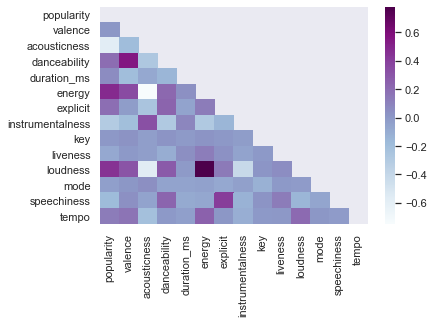

In [5]:
import numpy as np

# Compute the correlation matrix, dropping the Open column
corr_all = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask, cmap = "BuPu")

From this heatmap we can conclude that the most important variables are

- danceability
- duration_ms
- energy
- explicit
- loudness
- tempo

## Pre-processing

#### Null values

In [6]:
df.isnull().sum()

popularity          0
valence             0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
dtype: int64

#### Obtain the x and y values

In [7]:
columns = ['danceability', 'duration_ms', 'energy', 'explicit', 'loudness', 'tempo']
X = df[columns]
Y = popularity

#### Scale inputs

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#### Separate into training and validation dataset

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled_X, Y, test_size=0.30)

## Modeling

#### Tensorflow - MLP

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()
model = Sequential([
    Dense(50, activation='relu', input_shape=(len(columns),)),
    Dense(10, activation='tanh'),
    Dense(50, activation='relu'),
    Dense(10, activation='tanh'),
    Dense(50, activation='relu'),
    Dense(10, activation='tanh'),
    Dense(50, activation='relu'),
    Dense(10, activation='tanh'),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mse', metrics=[rmse])
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
3734/3734 [==============================] - 11s 3ms/step - loss: 687.1597 - root_mean_squared_error: 26.2137
Epoch 2/15
3734/3734 [==============================] - 11s 3ms/step - loss: 477.1467 - root_mean_squared_error: 21.8437
Epoch 3/15
3734/3734 [==============================] - 10s 3ms/step - loss: 371.8975 - root_mean_squared_error: 19.2846
Epoch 4/15
3734/3734 [==============================] - 8s 2ms/step - loss: 323.9333 - root_mean_squared_error: 17.9981
Epoch 5/15
3734/3734 [==============================] - 7s 2ms/step - loss: 312.8805 - root_mean_squared_error: 17.6884
Epoch 6/15
3734/3734 [==============================] - 7s 2ms/step - loss: 300.5005 - root_mean_squared_error: 17.3349
Epoch 7/15
3734/3734 [==============================] - 7s 2ms/step - loss: 294.7877 - root_mean_squared_error: 17.1694
Epoch 8/15
3734/3734 [==============================] - 8s 2ms/step - loss: 291.7885 - root_mean_squared_error: 17.0818
Epoch 9/15
3734/3734 [===============